In [144]:
! gdown --id 1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ #архив в гугле

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k-kKZScv3oIvcEF3Tk2r6F9wD1voQYfZ
To: /content/archive.zip
100% 554k/554k [00:00<00:00, 82.1MB/s]


In [145]:
! unzip /content/archive.zip #распаковка архива

Archive:  /content/archive.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter('ignore')


from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

In [147]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [148]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [152]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [153]:
df_train['education'] = df_train['education'].replace('unknown', 'others')
df_train['job'] = df_train['job'].replace('unknown', 'others')
df_test['education'] = df_test['education'].replace('unknown', 'others')
df_test['job'] = df_test['job'].replace('unknown', 'others')
df_test['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: job, dtype: int64

In [154]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_test = df_test.apply(LabelEncoder().fit_transform)

In [155]:
df_train['log_balance'] = np.log(df_train['balance'])

In [156]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,11,1,1,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,8,1,2,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,3,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,3,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,2,0,274,1,0,2,4,8,222,0,0,0,3,0


del df_train['previous']
del df_train['poutcome']
del df_test['previous']
del df_test['poutcome']

In [159]:
df_train = df_train.drop(["loan", "campaign"], axis = 1)
df_test = df_test.drop(["loan", "campaign"], axis = 1)

In [169]:
df_test = df_test.drop(["balance"], axis = 1)
df_train = df_train.drop(["balance"], axis = 1)

In [170]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           45211 non-null  int64  
 1   job           45211 non-null  int64  
 2   marital       45211 non-null  int64  
 3   education     45211 non-null  int64  
 4   default       45211 non-null  int64  
 5   housing       45211 non-null  int64  
 6   contact       45211 non-null  int64  
 7   day           45211 non-null  int64  
 8   month         45211 non-null  int64  
 9   duration      45211 non-null  int64  
 10  pdays         45211 non-null  int64  
 11  y             45211 non-null  int64  
 12  log_balance   45211 non-null  float64
 13  log_duration  45211 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 4.8 MB


<Axes: xlabel='log_duration', ylabel='Count'>

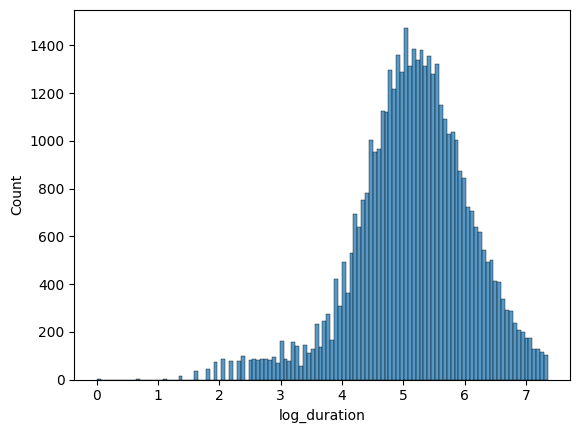

In [171]:
df_train["log_duration"] = np.log(df_train["duration"])
sns.histplot(df_train, x = "log_duration")

Произведено разбиение датасета на тернировочную/тестовую выборки

In [172]:
X_train = df_train.drop(['job','marital','day','month','y'], axis = 1)
y_train = df_train['y']

In [174]:
X_test = df_test.drop(['job','marital','day','month','y'],axis=1)
y_test = df_test['y']

In [175]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);

Точность простой модели = 0.88476

In [176]:
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.8847600088476001

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           45211 non-null  int64  
 1   job           45211 non-null  int64  
 2   marital       45211 non-null  int64  
 3   education     45211 non-null  int64  
 4   default       45211 non-null  int64  
 5   housing       45211 non-null  int64  
 6   contact       45211 non-null  int64  
 7   day           45211 non-null  int64  
 8   month         45211 non-null  int64  
 9   duration      45211 non-null  int64  
 10  pdays         45211 non-null  int64  
 11  y             45211 non-null  int64  
 12  log_balance   45211 non-null  float64
 13  log_duration  45211 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 4.8 MB


In [177]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

ValueError: ignored

In [ ]:
Но точность логистической регрессии чуть ниже = 0.88387524

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

Наиболее частотный класс для классификации, среднее/медиана для регрессии

Что-то с точностью логистической регрессии не так, получается в доля правильных ответов меньше, чем 53%

In [ ]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')

In [ ]:
А полнота вообще получилась 0.0806, видимо это влияние того, что баланс я не первела

In [ ]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Получается в тесовых данных нет ложно-положительных и ложно-отрицательных

In [ ]:
confusion_matrix(y_test, y_pred_dummy)

Получается есть ложные ответы

In [ ]:
confusion_matrix(y_test, y_pred_log_reg)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

log_reg = LogisticRegression()
cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='f1')

In [ ]:
print(f'MSE for Dummy Regressor: {mean_squared_error(y_test, y_pred_dummy)}')
print(f'MSE for Linear regression: {mean_squared_error(y_test, y_pred_log_reg)}')

In [ ]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_pred_dummy, squared=False)}')
print(f'RMSE for Linear regression: {mean_squared_error(y_test, y_pred_log_reg, squared=False)}')